# Assignment 6
Group D
## Exercise 1: Fuzzy Clustering
1. 
- calculate distances from points to clusters:
|       | $p_1$      | $p_2$ | $p_3$      | $p_4$      |
|-------|------------|-------|------------|------------|
| $c_1$ | $\sqrt{2}$ | 1     | 1          | $\sqrt{2}$ |
| $c_2$ | $\sqrt{5}$ | 2     | $\sqrt{2}$ | 1          |

- applying equation $(2)$ for $f_{2,1}$ and $f_{4,1}$ ($f_{2,2} = 1 - f_{2,1}$):
    - $f_{2,1} = 1/(1+1/4) = 4/5$
    - $f_{4,1} = 1/(1+2) = 1/3$
    - thus we get $F = \begin{pmatrix} 5/7 & 2/7 \\ 4/5 & 1/5 \\ 2/3 & 1/3 \\ 1/3 & 2/3 \end{pmatrix}$

2. recalculate cluster centers

In [26]:
import numpy as np

def sumPoints(Fj,p,b):
    s = (0,0)
    for mu in range(len(Fj)):
        s += Fj[mu]**b * p[mu]
    return s

F = np.array([[5/7, 2/7],[4/5, 1/5],[2/3, 1/3],[1/3, 2/3]])
b = 2
p = np.array([(0,0),(1,0),(2,1),(2,2)])

c_1 = 1 / sum(F[:,0]**2) * sumPoints(F[:,0],p,b)
c_2 = 1 / sum(F[:,1]**2) * sumPoints(F[:,1],p,b)
print(c_1)
print(c_2)

[1.64149739 0.78166543]
[3.24872756 2.46115725]


![cluster centers after 1 iteration](c(1).JPG)

3. The fuzzy result differs just slightly from the expected crisp clustering result of $c_1(100)=\begin{pmatrix} 0.5 \\ 0\end{pmatrix}$ and $c_2(100)=\begin{pmatrix} 2 \\ 1.5 \end{pmatrix}$

4. a)
- i. A higher value for $b$ makes the clusters move towards the origin (0,0). Thus they come closer together and the clustering becomes more ambiguous. The algorithm still works, but it is not very useful anymore.
- ii. The overlap increases.

b)

c)

d)

## Exercise 2: Crisp vs. Fuzzy $k$-means
1. Crisp has better computational performance as only one membership has to be tracked for each data point. \[todo: source\]
2. The crisp algorithm shows a stronger reaction to increasing noise: the cluster center moves faster towards the noise source. At a noise level of 85 the clusters suddenly rearrange: the cluster centers jump to entirely different locations, leaving one noise cluster and one cluster that is comprised of roughly the original clusters. The clusters of the fuzzy algorithm does not jump.

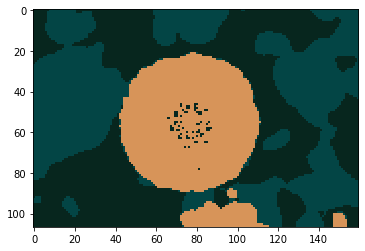

In [67]:
# 3
from sklearn.datasets import load_sample_image
from skimage.transform import rescale
from skimage.util import random_noise
from skfuzzy import cmeans
import matplotlib.pyplot as plt
import numpy as np


def cluster_image(image,n_clusters,fuzzifier):
    n_pixels = image.shape[0]*image.shape[1]
    pixel_list = np.reshape(image, (n_pixels,3))
    
    # applying fuzzy k-means algorithm
    cntr, u, u0, d, jm, p, fpc =  cmeans(pixel_list.T,c=n_clusters,m=fuzzifier,error=1e-4,maxiter=2000,seed=1)
    # find nearest centroids and replace
    cluster_membership = np.argmax(u, axis=0)
    k = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i,j,:] = cntr[cluster_membership[k]]
            k += 1
    return image 
    
n_clusters = 3
fuzzifier = 4
noise_ratios = [0, 0.02, 0.05]

image = load_sample_image("flower.jpg")
image = rescale(image, (0.25,0.25,1)) # automatically transforms image to range [0;1]
# create img versions with noise
images_noise = []
for noise_ratio in noise_ratios:
    images_noise.append(random_noise(image,mode='s&p',seed=1,amount=noise_ratio))
    clustered_image = cluster_image(image,n_clusters,fuzzifier)
    plt.imshow(clustered_image)
